# <center> Regresión lineal simple con Python

## Teoría 
Como mencione en el Readme de este repositorio la regresión lineal es un método estadístico que trata de modelar la relación entre una variable continua y una o más variables independientes mediante el ajuste de una ecuación lineal. El ajusto en el caso de una regresión simple es cuando solo hay una variable independiente.

## Modelos de regresión lineal en Python

Dos de las implementaciones de modelos de regresión lineal más utilizadas en Python son: `scikit-learn` y `statsmodels`. Aunque ambas están muy optimizadas, Scikit-learn está orientada principalmente a la predicción, por lo que no dispone de apenas funcionalidades que muestren las muchas características del modelo que se deben analizar para hacer inferencia. **Statsmodels** es mucho más completo en este sentido.

## ¿Porqué lineal?


El término "lineal" en los modelos de regresión hace referencia al hecho de que los parámetros se **incorporan en la ecuación de forma lineal**, no a que necesariamente la relación entre cada predictor y la variable respuesta tenga que seguir un patrón lineal.

La siguiente ecuación muestra un modelo lineal en el que el predictor $x_1$ no es lineal respecto a $y$:

$$ y = \beta_0 +\beta_1 x_1 +\beta_2 log(x_1) + \varepsilon $$

## Ajuste del modelo
Una vez ajustado el modelo, es necesario verificar su utilidad ya que, aun siendo la línea que mejor se ajusta a las observaciones de entre todas las posibles, **puede tener un gran error**. Las métricas más utilizadas para medir la calidad del ajuste son: el error estándar de los residuos y el coeficiente de determinación  $R^2$.

## Error estándar de los residuos (Residual Standar Error, RSE)

Mide la desviación promedio de cualquier punto estimado por el modelo respecto de la recta de regresión. Tiene las mismas unidades que la variable respuesta. Una forma de saber si el valor del RSE es elevado consiste en dividirlo entre el valor medio de la variable respuesta, obteniendo así un % de la desviación.

$$RSE = \sqrt{\dfrac{1}{n-p-1}RSS}$$

En modelos lineales simples, dado que hay un único predictor $(n-p-1)=(n-2)$.

## Coeficiente de determinación $R^2$

## Modelo F-test

Uno de los primeros resultados que hay que evaluar al ajustar un modelo es el resultado del test de significancia  $F$. Este contraste responde a la pregunta de si el modelo en su conjunto es capaz de predecir la variable respuesta mejor de lo esperado por azar, o lo que es equivalente, si al menos uno de los predictores que forman el modelo contribuye de forma significativa. Para realizar este contraste se compara la suma de residuos cuadrados del modelo de interés con la del modelo sin predictores, formado únicamente por la media (también conocido como suma de cuadrados corregidos por la media,  $TSS$)

$$F=\dfrac{(TSS - RSS)/(p-1)}{RSS/(n-p)}$$

Con frecuencia, la hipótesis nula y alternativa de este test se describen como:
- $H_0 : \beta_1 = \ldots = \beta_{p-1} = 0$
- $H_a :$ al menos $ \beta_{i} \not= 0$

Si el test  $F$ resulta significativo, implica que el modelo es útil, pero no que sea el mejor. Podría ocurrir que alguno de sus predictores no fuese necesario

## Validación del modelo


Una vez seleccionado el mejor modelo que se puede crear con los datos disponibles, se tiene que comprobar su capacidad prediciendo nuevas observaciones que no se hayan empleado para entrenarlo, de este modo se verifica si el modelo se puede generalizar. Una estrategia comúnmente empleada es dividir aleatoriamente los datos en dos grupos, ajustar el modelo con el primer grupo y estimar la precisión de las predicciones con el segundo.

El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, 80%-20% suele dar buenos resultados.

## Condiciones para la regresión lineal


Para que un modelo de regresión lineal por mínimos cuadrados, y las conclusiones derivadas de él, sean completamente válidas, se deben verificar que se cumplen las asunciones sobre las que se basa su desarrollo matemático. En la práctica, rara vez se cumplen, o se puede demostrar que se cumplen todas, sin embargo esto no significa que el modelo no sea útil. Lo importante es ser consciente de ellas y del impacto que esto tiene en las conclusiones que se extraen del modelo.


### No colinealidad o multicolinealidad:

En los modelos lineales múltiples, los predictores deben ser independientes, no debe de haber colinealidad entre ellos. La colinealidad ocurre cuando un predictor está linealmente relacionado con uno o varios de los otros predictores del modelo. Como consecuencia de la colinealidad, no se puede identificar de forma precisa el efecto individual que tiene cada predictor sobre la variable respuesta, lo que se traduce en un incremento de la varianza de los coeficientes de regresión estimados hasta el punto de que resulta imposible establecer su significancia estadística. Además, pequeños cambios en los datos, provocan grandes cambios en las estimaciones de los coeficientes. Si bien la colinealidad propiamente dicha existe solo si el coeficiente de correlación simple o múltiple entre predictores es 1, cosa que raramente ocurre en la realidad, es frecuente encontrar la llamada casi-colinealidad o multicolinealidad no perfecta.

No existe un método estadístico concreto para determinar la existencia de colinealidad o multicolinealidad entre los predictores de un modelo de regresión, sin embargo, se han desarrollado numerosas reglas prácticas que tratan de determinar en qué medida afectan al modelo. Los pasos recomendados a seguir son:

### Relación lineal entre los predictores numéricos y la variable respuesta

Cada predictor numérico tiene que estar linealmente relacionado con la variable respuesta $y$ mientras los demás predictores se mantienen constantes, de lo contrario no se deben introducir en el modelo. La forma más recomendable de comprobarlo es representando los residuos del modelo frente a cada uno de los predictores. Si la relación es lineal, los residuos se distribuyen de forma aleatoria en torno a cero. Estos análisis son solo aproximados, ya que no hay forma de saber si realmente la relación es lineal cuando el resto de predictores se mantienen constantes.


### Distribución normal de la variable respuesta

La variable respuesta se tiene que distribuir de forma normal. Para comprobarlo se recurre a histogramas, a los cuantiles normales o a test de hipótesis de normalidad.

### Tamaño de la muestra

No se trata de una condición de por sí pero, si no se dispone de suficientes observaciones, predictores que no son realmente influyentes podrían parecerlo. Un recomendación frecuente es que el número de observaciones sea como mínimo entre 10 y 20 veces el número de predictores del modelo.

## Ejemplo 0



In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Datos de ejemplo
x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2, 3, 4, 5, 6])

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(x, y)

# Obtener los coeficientes del modelo
print('Coeficiente de la pendiente:', model.coef_)
print('Coeficiente del intercepto:', model.intercept_)

# Predecir nuevos valores
x_new = np.array([6, 7, 8]).reshape((-1, 1))
y_pred = model.predict(x_new)
print('Valores predichos:', y_pred)

Coeficiente de la pendiente: [1.]
Coeficiente del intercepto: 1.0
Valores predichos: [7. 8. 9.]


# Ejemplo 1

Un ejemplo clásico es estudiar la relación entre las horas de estudio por día y la calificación obtenida por un estudiante, entonces vamos a recrear un ejemplo de datos tomados en una escuela donde le preguntamos a 50 estudiante cuanto tiempo estudiaron la ultima semana (5 días) y la calificación que obtuvieron

In [1]:
import pandas as pd
import numpy as np

# Generar datos aleatorios
np.random.seed(123)  # Para reproducibilidad
horas_estudio = np.random.randint(1, 11, size=50)
calificaciones = np.random.uniform(5, 10, size=50)

# Crear el DataFrame
data = {'Horas de estudio': horas_estudio, 'Calificación': calificaciones}
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

    Horas de estudio  Calificación
0                  3      7.842153
1                  3      6.512747
2                  7      7.486544
3                  2      8.416315
4                  4      9.583493
5                 10      5.544645
6                  7      7.477459
7                  2      6.164180
8                  1      7.184303
9                  2      8.757715
10                10      7.404461
11                 1      8.988642
12                 1      6.413515
13                10      7.167091
14                 4      5.048787
15                 5      6.703980
16                 1      8.446360
17                 1      9.346846
18                 5      6.339019
19                 2      7.283740
20                 8      6.341407
21                 4      9.185264
22                 3      6.352573
23                 5      7.650310
24                 8      5.876863
25                 3      6.574832
26                 5      9.455545
27                 9

Veamos un gráfico de dispersión para estudiar si existe una posible correlación

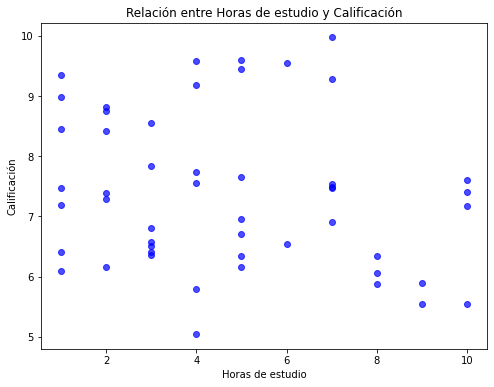

In [3]:
import matplotlib.pyplot as plt
# Graficar el diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Horas de estudio'], df['Calificación'], color='blue', alpha=0.7)
plt.title('Relación entre Horas de estudio y Calificación')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
plt.show()

como vemos no hay a priori una relación lineal

In [4]:
# Calcular el coeficiente de correlación
coef_correlacion = df['Horas de estudio'].corr(df['Calificación'])

# Imprimir el coeficiente de correlación
print('Coeficiente de correlación:', coef_correlacion)

Coeficiente de correlación: -0.20373622753474213


Es negativa, así que no deberia influir, esto e afecto por como hemos gestado los datos aleatorios, probemos con una condición adicional


In [5]:
# Generar datos aleatorios
np.random.seed(42)  # Fijar una semilla para reproducibilidad
horas_estudio = np.random.randint(1, 11, size=50)
calificacion = np.where(horas_estudio > 5, np.random.uniform(7.5, 10, size=50), np.random.uniform(5, 10, size=50))

# Crear el DataFrame
df = pd.DataFrame({'Horas de estudio': horas_estudio, 'Calificación': calificacion})

# Imprimir el DataFrame
print(df)

    Horas de estudio  Calificación
0                  7      7.585971
1                  4      7.806386
2                  8      8.146950
3                  5      7.468978
4                  7      8.279278
5                 10      8.800170
6                  3      5.127096
7                  7      7.962136
8                  8      9.923962
9                  5      8.182052
10                 4      6.571780
11                 8      9.737068
12                 8      8.994750
13                 3      6.246461
14                 6      7.721231
15                 5      8.777756
16                 2      6.143991
17                 8      8.313326
18                 6      8.471693
19                 2      5.806106
20                 5      9.648488
21                 1      9.040602
22                10      8.202336
23                 6      8.856740
24                 9      7.852311
25                 1      5.932850
26                10      7.686377
27                 3

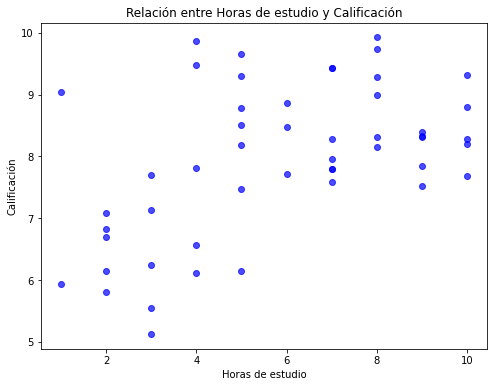

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Horas de estudio'], df['Calificación'], color='blue', alpha=0.7)
plt.title('Relación entre Horas de estudio y Calificación')
plt.xlabel('Horas de estudio')
plt.ylabel('Calificación')
plt.show()

In [7]:
# Calcular el coeficiente de correlación
coef_correlacion = df['Horas de estudio'].corr(df['Calificación'])

# Imprimir el coeficiente de correlación
print('Coeficiente de correlación:', coef_correlacion)

Coeficiente de correlación: 0.5107038285815377


Un cambio drastico, ya se esboza una relación lineal y como academicos sabemos que la dedicación tiene sus frutos, nos quedaremos con este conjunto de datos.

In [8]:
import pandas as pd

# Calcular la media
media = df['Calificación'].mean()

# Calcular la mediana
mediana = df['Calificación'].median()

# Calcular la moda
moda = df['Calificación'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)

Media: 7.951063310295166
Mediana: 8.164501005159472
Moda: 0     5.127096
1     5.550260
2     5.806106
3     5.932850
4     6.110539
5     6.139676
6     6.143991
7     6.246461
8     6.571780
9     6.688076
10    6.818148
11    7.087055
12    7.135539
13    7.468978
14    7.513805
15    7.585971
16    7.686377
17    7.696711
18    7.721231
19    7.789673
20    7.798986
21    7.806386
22    7.852311
23    7.962136
24    8.146950
25    8.182052
26    8.202336
27    8.277456
28    8.279278
29    8.312958
30    8.313326
31    8.327245
32    8.396164
33    8.471693
34    8.515095
35    8.777756
36    8.800170
37    8.856740
38    8.994750
39    9.040602
40    9.283112
41    9.303653
42    9.324015
43    9.428176
44    9.430612
45    9.480456
46    9.648488
47    9.737068
48    9.858910
49    9.923962
Name: Calificación, dtype: float64


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = df[['Horas de estudio']]
y = df['Calificación']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener la puntuación de ajuste del modelo
score = model.score(X_test, y_test)
print("Puntuación del modelo:", score)

# Predecir las calificaciones para nuevos valores de horas de estudio
horas_estudio_nuevas = [[7], [9], [11]]
calificaciones_predichas = model.predict(horas_estudio_nuevas)
print("Calificaciones predichas:", calificaciones_predichas)

Puntuación del modelo: -0.6062963731466551
Calificaciones predichas: [8.40584894 8.82223051 9.23861208]


c:\Users\tesbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Como observamos para nuevas horas de estudio, si son mas de 5 entonces aprobará lo cuál es logíco.

El siguiente módelo es mucho más complejo de analizar qunque tengamos sólo dos variables pero es más estructurado.

# Ejemplo 2


Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de *runs* que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

### Librerías


Las librerías utilizadas en este ejemplo son:

In [2]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Datos

In [5]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head()

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


### Representación gráfica


El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

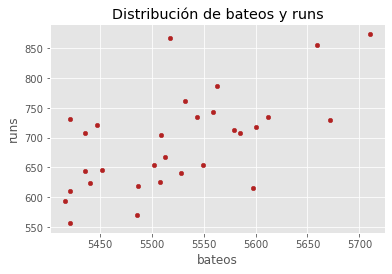

In [8]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84)) 

datos.plot(
    x    = 'bateos', #eje x
    y    = 'runs', #eje y
    c    = 'firebrick', #Color ladrillo
    kind = "scatter", #Dispersión
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [9]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206688
P-value:  0.0003388351359791963


El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el número de runs en función del número de bateos del equipo.

### Ajuste del modelo


Se ajusta un modelo empleando como variable respuesta runs y como predictor bateos. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

### Scikit-learn

In [11]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train

In [12]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1), #Normalizan los datos en eje X
                                        y.values.reshape(-1,1), #Normalizan los datos
                                        train_size   = 0.8,
                                        random_state = 1234, # Repetición de resultados
                                        shuffle      = True # aleatorizar
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [14]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_) # Donde intercepta el eje Y
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), ))) #una lista de los coeficientes betas
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2367.7028413]
Coeficiente: [('bateos', 0.5528713534479736)]
Coeficiente de determinación R^2: 0.3586119899498744


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [23]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test) # Hacemos las comprobaciones con los datos segementados para las pruebas
print(predicciones[0:3,]) #Nuestras predicciones 

rmse = mean_squared_error(
        y_true  = y_test, # diferencia en las imagenes
        y_pred  = predicciones, # diferencia entre nuestras predicciones y las observaciones
        squared = False # Sin raiz 
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 59.336716083360486


In [25]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test) # Hacemos las comprobaciones con los datos segementados para las pruebas
print(predicciones[0:3,]) #Nuestras predicciones 

rmse = mean_squared_error(
        y_true  = y_test, # diferencia en las imagenes
        y_pred  = predicciones, # diferencia entre nuestras predicciones y las observaciones
        squared = True # Sin raiz 
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es: 3520.8458755573306


## Statsmodels
La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

* Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

* Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [27]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [28]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'runs'])
# modelo = smf.ols(formula = 'runs ~bateos', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

In [29]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sat, 29 Apr 2023   Prob (F-statistic):            0.00906
Time:                        09:24:54   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

## Intervalos de confianza de los coeficientes

In [30]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

## Predicciones


Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

* `predict()`: devuelve únicamente el valor de las predicciones.

* `get_prediction().summary_frame()`: devuelve, además de las predicciones, los intervalos de confianza asociados

In [31]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088


## Representación gráfica del modelo


Además de la línea de mínimos cuadrados, es recomendable incluir los límites superior e inferior del intervalo de confianza. Esto permite identificar la región en la que, según el modelo generado y para un determinado nivel de confianza, se encuentra el valor promedio de la variable respuesta.

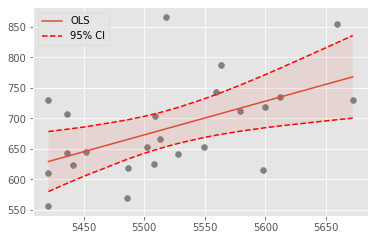

In [32]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

## Error de test

In [33]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 59.33671608336119


## Interpretación
La columna `(coef)` devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal $(\beta_0$ y $ \beta_1)$ que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 27.1% de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test F (Prob (F-statistic) = 0.00906) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

$$runs = -2367.7028 + 0.6305 \ bateos$$
 
Por cada unidad que se incrementa el número de bateos, el número de runs aumenta **en promedio** 0.6305 unidades.

El error de test del modelo es de **59.34**. Las predicciones del modelo final se alejan en promedio **59.34** unidades del valor real.

# Ejemplo 2